<a href="https://colab.research.google.com/github/ssanchezgoe/eafit_isa/blob/main/Nb_Google_Colab/S03_Bases_Estadisticas_Version_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <tr>
     <th><p><img alt="Colaboratory logo" height="80px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Sena_Colombia_logo.svg/1045px-Sena_Colombia_logo.svg.png" align="left" hspace="10px" vspace="0px"></p></th> 
    <th><p><img alt="Colaboratory logo" height="80px" src="https://www.isa.co/wp-content/uploads/2020/11/logo.png" align="right" hspace="10px" vspace="0px"></p></th>
    <th><p><img alt="Colaboratory logo" height="80px" src="https://upload.wikimedia.org/wikipedia/commons/b/bf/EAFIT-2015.png" align="left" hspace="10px" vspace="0px"></p></th> 
     <th><h1>  Bases de Estadística Básica Aplicada </h1></th>
  </tr>








# Temática
- <a href="#manipulacionDatos">1. Manipulación de datos</a><br>
 - <a href="#formateo">1.1 Formateo de datos temporales</a><br>
 - <a href="#procesamientoNulos">1.2 Procesamiento de datos nulos</a><br>
 - <a href="#indexacion">1.3. Indexación y localización</a><br>
 - <a href="#organizacionDF">1.4. Organización de dataframes</a><br>
 - <a href="#graficasPandas">1.5. Graficando desde pandas</a><br>
 - <a href="#operacionesColFil">1.6. Operaciones con columnas y filas</a><br>
  - <a href="#agrupacion"> 1.7. Agrupando dataframes</a><br>
  - <a href="#renormalizacion">1.8. Renormalización de datos</a><br>
  - <a href="#bineado"> 1.9. Bineado de datos</a><br>
  - <a href="#concom"> 1.10. Concatenación y combinación de dataframes</a><br>
- <a href="#tallpan">2. Taller Pandas</a><br>

<p><a name="manipulacionDatos"></a></p>

# 1. Manipulación de datos

In [26]:
import pandas as pd # se basa en el elemento dataframes (tabla) 
import numpy as np # se basa en el elemento array
import matplotlib.pyplot as plt

In [27]:
my_dict = {'k1':[1,2,'?'], 'k2' : [4,5,6] }

In [28]:
type(np.nan)

float

In [29]:
df1 = pd.DataFrame(my_dict) # Crear un objeto: instanciar

In [30]:
df1

,k1,k2
0,1,4
1,2,5
2,?,6


In [31]:
df1.dtypes

k1    object
k2     int64
dtype: object

In [32]:
list(df1.k1.index)

[0, 1, 2]

In [33]:
my_array = np.array([1,2,3]) # instancia

Nota aclaratoria en `python` todo es objetos, como tal, tendran tanto:

- Atributos (valores o propiedades)
- Métodos (funciones)

**Advertencia!**

Es necesario usar nombre de columnas sin espacios o caracteres especiales.

In [34]:
my_dict = {'k 1':[1,2,'?'], 'k2' : [4,5,6] }
df_mal = pd.DataFrame(my_dict)
df_mal

,k 1,k2
0,1,4
1,2,5
2,?,6


In [35]:
df_mal.k 1 

SyntaxError: ignored

In [41]:
df_mal['k 1']

0    1
1    2
2    ?
Name: k 1, dtype: object

In [42]:
pd.read_csv?

Como crea un `dataframe` a partir del método `pd.read_csv()`

In [43]:
df=pd.read_csv("https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s03/dataVentas2009.csv") 

In [44]:
df.describe()

,Producto1,Producto2,Producto3,Producto4
count,365.000000,365.000000,365.000000,178.000000
mean,2032.200000,1060.252055,2093.169863,2576.359551
std,1878.879799,1079.533086,1854.368523,2484.004743
min,0.000000,0.000000,0.000000,0.000000
25%,194.000000,90.000000,228.000000,0.000000
50%,1726.000000,678.000000,1686.000000,1443.500000
75%,3540.000000,1882.000000,3520.000000,4638.000000
max,6626.000000,4242.000000,6587.000000,7575.000000


Como hemos creado un dataframe, entonces vamos a tener una serie de atributos y métodos:

In [45]:
df.head(10)

,Fecha,Producto1,Producto2,Producto3,Producto4
0,01/01/2009,29,20,35,NaN
1,02/01/2009,19,3,22,NaN
2,03/01/2009,24,12,22,NaN
3,04/01/2009,24,8,15,NaN
4,05/01/2009,120,111,141,NaN
5,06/01/2009,261,146,236,NaN
6,07/01/2009,60,33,80,NaN
7,08/01/2009,24,14,14,NaN
8,09/01/2009,35,20,32,NaN
9,10/01/2009,81,45,79,NaN


In [46]:
df.sample(10)

,Fecha,Producto1,Producto2,Producto3,Producto4
268,26/09/2009,2603,0,2873,2547.0
12,13/01/2009,168,94,172,NaN
333,30/11/2009,747,412,1175,0.0
313,10/11/2009,2526,1270,3430,1300.0
297,25/10/2009,1124,611,1354,833.0
157,07/06/2009,2742,1500,1381,NaN
236,25/08/2009,5450,2671,5698,7044.0
215,04/08/2009,4417,2382,4350,5384.0
16,17/01/2009,25,13,20,NaN
39,09/02/2009,190,112,190,NaN


Python es un lenguaje interpretado, es decir, interpreta tipos automaticamente.

In [47]:
my_number = 1.0
type(my_number)

float

In [48]:
df.dtypes

Fecha         object
Producto1      int64
Producto2      int64
Producto3      int64
Producto4    float64
dtype: object

In [49]:
df.columns

Index(['Fecha', 'Producto1', 'Producto2', 'Producto3', 'Producto4'], dtype='object')

In [50]:
df.shape

(365, 5)

In [51]:
df.describe()

,Producto1,Producto2,Producto3,Producto4
count,365.000000,365.000000,365.000000,178.000000
mean,2032.200000,1060.252055,2093.169863,2576.359551
std,1878.879799,1079.533086,1854.368523,2484.004743
min,0.000000,0.000000,0.000000,0.000000
25%,194.000000,90.000000,228.000000,0.000000
50%,1726.000000,678.000000,1686.000000,1443.500000
75%,3540.000000,1882.000000,3520.000000,4638.000000
max,6626.000000,4242.000000,6587.000000,7575.000000


In [52]:
df.describe(include='all')

,Fecha,Producto1,Producto2,Producto3,Producto4
count,365,365.000000,365.000000,365.000000,178.000000
unique,365,NaN,NaN,NaN,NaN
top,28/06/2009,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,2032.200000,1060.252055,2093.169863,2576.359551
std,NaN,1878.879799,1079.533086,1854.368523,2484.004743
min,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,194.000000,90.000000,228.000000,0.000000
50%,NaN,1726.000000,678.000000,1686.000000,1443.500000
75%,NaN,3540.000000,1882.000000,3520.000000,4638.000000


Como acceder a las columnas de un dataframe:

In [53]:
type(df.Producto1)

pandas.core.series.Series

In [54]:
df.Producto1.unique()

array([  29,   19,   24,  120,  261,   60,   35,   81,  318,  105,  168,
        145,  131,   93,   25,   52,  136,  147,  109,  172,  148,   15,
        209,   92,  110,   14,  158,  179,  122,   95,  185,   82,  190,
        228,  306,  188,   98,  139,  258,  304,  326,  134,  125,   96,
         65,  123,  129,  154,  239,  198,   32,   67,  157,  164,  300,
        176,  195,  310,    7,  366,  234,  132,  203,  298,  541,  525,
        871,  592,  455,  446,  441,  266,  189,  343,  292,  355,  245,
          0,  445, 1286, 1178, 2131, 2709,  752, 1886, 2069, 3132, 3668,
       1368, 4051, 2286, 3519, 3520, 1925, 2125, 2662, 4403, 4338, 2757,
        970, 2767, 1493,  728, 3982, 4742, 5278, 2344, 4094,  784, 1048,
       2442, 3686, 3042, 5728, 3815, 3540, 4775, 4434, 4363, 2075, 2338,
       1387, 2063, 2031, 3274, 4325, 5430, 6028, 3876, 2742, 4973, 1125,
       3460, 4449, 3576, 4027, 4313, 3182, 5668, 6320, 2397, 2857, 2590,
       3234, 5138, 5799, 4911, 4333, 3680, 1536, 30

In [55]:
for col in df.columns:
  print(df[col])


0      01/01/2009
1      02/01/2009
2      03/01/2009
3      04/01/2009
4      05/01/2009
          ...    
360    27/12/2009
361    28/12/2009
362    29/12/2009
363    30/12/2009
364    31/12/2009
Name: Fecha, Length: 365, dtype: object
0       29
1       19
2       24
3       24
4      120
      ... 
360     66
361     61
362     89
363     76
364     53
Name: Producto1, Length: 365, dtype: int64
0       20
1        3
2       12
3        8
4      111
      ... 
360     29
361     41
362     52
363     43
364     46
Name: Producto2, Length: 365, dtype: int64
0       35
1       22
2       22
3       15
4      141
      ... 
360     52
361     99
362    115
363    115
364    112
Name: Producto3, Length: 365, dtype: int64
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
360    0.0
361    0.0
362    0.0
363    0.0
364    0.0
Name: Producto4, Length: 365, dtype: float64


In [56]:
len(df['Producto1'].unique())

328

In [57]:
len(df)

365

In [58]:
df.isnull()

,Fecha,Producto1,Producto2,Producto3,Producto4
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
360,False,False,False,False,False
361,False,False,False,False,False
362,False,False,False,False,False
363,False,False,False,False,False


In [59]:
True+True+False

2

In [60]:
df.isnull().sum()

Fecha          0
Producto1      0
Producto2      0
Producto3      0
Producto4    187
dtype: int64

<p><a name="formateo"></a></p>

## 1.1. Formateo de datos temporales

La función `to_datetime` permite convertir los datos a un formato especial de tiempo

In [61]:
df[['Fecha']]

,Fecha
0,01/01/2009
1,02/01/2009
2,03/01/2009
3,04/01/2009
4,05/01/2009
...,...
360,27/12/2009
361,28/12/2009
362,29/12/2009
363,30/12/2009


In [62]:
pd.to_datetime(df.Fecha)

0     2009-01-01
1     2009-02-01
2     2009-03-01
3     2009-04-01
4     2009-05-01
         ...    
360   2009-12-27
361   2009-12-28
362   2009-12-29
363   2009-12-30
364   2009-12-31
Name: Fecha, Length: 365, dtype: datetime64[ns]

In [63]:
pd.to_datetime

<function pandas.core.tools.datetimes.to_datetime>

In [64]:
pd.to_datetime(df.Fecha, format='%d/%m/%Y').head()

0   2009-01-01
1   2009-01-02
2   2009-01-03
3   2009-01-04
4   2009-01-05
Name: Fecha, dtype: datetime64[ns]

In [65]:
df.Fecha.dtype

dtype('O')

In [66]:
df.Fecha=pd.to_datetime(df.Fecha)# Reasignación
df

,Fecha,Producto1,Producto2,Producto3,Producto4
0,2009-01-01,29,20,35,NaN
1,2009-02-01,19,3,22,NaN
2,2009-03-01,24,12,22,NaN
3,2009-04-01,24,8,15,NaN
4,2009-05-01,120,111,141,NaN
...,...,...,...,...,...
360,2009-12-27,66,29,52,0.0
361,2009-12-28,61,41,99,0.0
362,2009-12-29,89,52,115,0.0
363,2009-12-30,76,43,115,0.0


In [67]:
df.dtypes

Fecha        datetime64[ns]
Producto1             int64
Producto2             int64
Producto3             int64
Producto4           float64
dtype: object

In [68]:
df = df.set_index('Fecha')
df.head()

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


<p><a name="procesamientoNulos"></a></p>

## 1.2. Procesamiento de datos nulos (imputación)

In [69]:
df.head()

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


In [70]:
df.isnull().sample(10)

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-05-15,False,False,False,True
2009-06-04,False,False,False,True
2009-08-03,False,False,False,True
2009-10-02,False,False,False,True
2009-12-08,False,False,False,False
2009-06-14,False,False,False,True
2009-04-25,False,False,False,True
2009-09-25,False,False,False,False
2009-05-20,False,False,False,True


 Es lo mismo que df.isnull, ver: https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas

Usar el comando `fillna()` para reemplazar los valores nulos con el valor deseado. Puede hacerse en una sola columna `df.columna.fillna()` o en todas al mismo tiempo `df.fillna()` 

In [71]:
df.Producto4.fillna(0).isnull().sum()

0

In [72]:
df.sample(10)

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-12-05,4742,2983,3872,NaN
2009-08-29,1004,590,1231,1445.0
2009-10-12,219,110,363,0.0
2009-04-03,164,102,156,NaN
2009-02-27,198,121,157,NaN
2009-08-22,3492,1448,3110,4822.0
2009-02-10,2865,36,3735,1906.0
2009-10-18,1241,625,1497,1006.0
2009-09-06,1125,678,1312,NaN


In [73]:
df.Producto4.mean()==df.Producto4.dropna().mean()

True

In [74]:
# Solo visual
df.Producto4.fillna(0)

Fecha
2009-01-01    0.0
2009-02-01    0.0
2009-03-01    0.0
2009-04-01    0.0
2009-05-01    0.0
             ... 
2009-12-27    0.0
2009-12-28    0.0
2009-12-29    0.0
2009-12-30    0.0
2009-12-31    0.0
Name: Producto4, Length: 365, dtype: float64

In [75]:
df.Producto4.max()

7575.0

In [76]:
# Cambiando los datos
df.Producto4 = df.Producto4.fillna(df.Producto4.mean()) #Importante inplace
df

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-01-01,29,20,35,2576.359551
2009-02-01,19,3,22,2576.359551
2009-03-01,24,12,22,2576.359551
2009-04-01,24,8,15,2576.359551
2009-05-01,120,111,141,2576.359551
...,...,...,...,...
2009-12-27,66,29,52,0.000000
2009-12-28,61,41,99,0.000000
2009-12-29,89,52,115,0.000000


<p><a name="indexacion"></a></p>

## 1.3. Indexación y localización
Usando los comandos `iloc` y `loc`  en un dataframe, se puede acceder a los datos con base en las etiquetas y la ubicación respectivamente 

- `iloc`: Localizacion entera
- loc: localización por indice

In [77]:
df.iloc[100:110]

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-11-04,0,0,0,2576.359551
2009-12-04,0,0,0,2576.359551
2009-04-13,0,0,0,2576.359551
2009-04-14,0,0,0,2576.359551
2009-04-15,0,0,0,2576.359551
2009-04-16,0,0,0,2576.359551
2009-04-17,1286,820,1436,2576.359551
2009-04-18,1178,667,826,2576.359551
2009-04-19,2131,1155,1426,2576.359551


Indexación para un subconjunto de columnas

In [78]:
df[['Producto1','Producto4']].iloc[0:5]

,Producto1,Producto4
Fecha,,
2009-01-01,29,2576.359551
2009-02-01,19,2576.359551
2009-03-01,24,2576.359551
2009-04-01,24,2576.359551
2009-05-01,120,2576.359551


In [79]:
df.iloc[:,1:3]

,Producto2,Producto3
Fecha,,
2009-01-01,20,35
2009-02-01,3,22
2009-03-01,12,22
2009-04-01,8,15
2009-05-01,111,141
...,...,...
2009-12-27,29,52
2009-12-28,41,99
2009-12-29,52,115


In [80]:
df.loc["2009-10-01":"2009-10-10",['Producto1','Producto2']]

,Producto1,Producto2
Fecha,,
2009-10-01,81,45
2009-10-02,228,101
2009-10-03,366,203
2009-10-04,0,0
2009-10-05,728,362
2009-10-06,3460,2354
2009-10-07,6274,4242
2009-10-08,2999,1545
2009-10-09,5496,2921


Parar reasignar un valor de dataframe, simplemente se debe saber la localización, ya sea por indice o por etiqueta y usar el operador de asignación `=`

In [81]:
df.iloc[109,0]

2709

In [82]:
df.iloc[109,0]=1000

In [83]:
df.iloc[109,0]

1000

In [84]:
df.loc['2009-04-19','Producto1']

Fecha
2009-04-19    2131
Name: Producto1, dtype: int64

In [85]:
df.loc['2009-04-19','Producto1']=999

In [86]:
df.loc['2009-04-19','Producto1']

Fecha
2009-04-19    999
Name: Producto1, dtype: int64

Validemos la re-asignación de los valores

In [87]:
df[['Producto1']].iloc[108:110]

,Producto1
Fecha,
2009-04-19,999
2009-04-20,1000


<p><a name="organizacionDF"></a></p>

## 1.4. Organización de dataframes
El método `sort_values` permite organizar los dataframes con base a los valores de las columnas o las filas

In [88]:
df.sort_values(by=["Producto1","Producto2"], ascending=False).head(10)

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-09-07,6626,4227,5751,7575.000000
2009-06-17,6320,3388,6047,2576.359551
2009-10-07,6274,4242,5435,7268.000000
2009-07-15,6100,3767,5536,6939.000000
2009-05-06,6028,4120,4223,2576.359551
2009-03-08,5904,3102,4853,7194.000000
2009-07-28,5891,3292,5437,7219.000000
2009-06-23,5799,3114,5386,2576.359551
2009-07-21,5754,3745,5357,6996.000000


In [89]:
df.Producto1.max()

6626

<p><a name="graficasPandas"></a></p>

## 1.5. Graficando desde pandas
Pandas permite realizar algunas gráficas directamente con el comando `DataFrame.plot()`.   

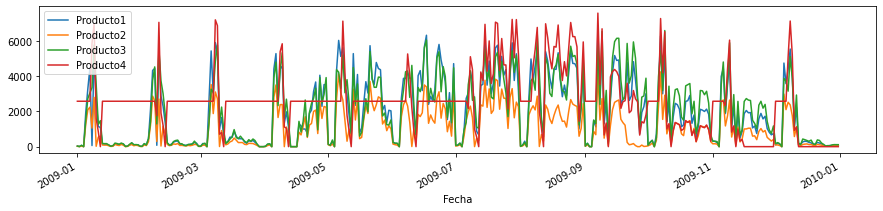

In [90]:
df.plot(figsize=(15,3))
plt.show()

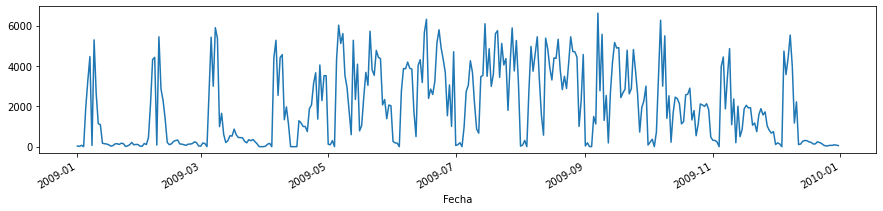

In [91]:
df.Producto1.plot(figsize=(15,3))
plt.show()

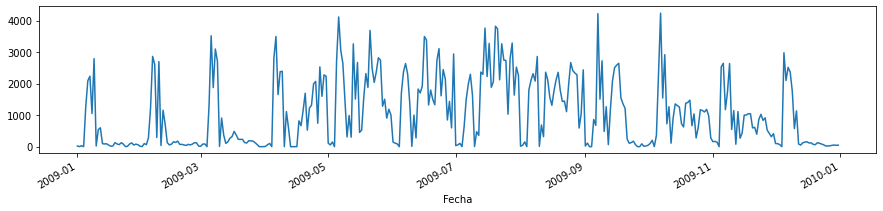

In [92]:
df.Producto2.plot(figsize=(15,3))
plt.show()

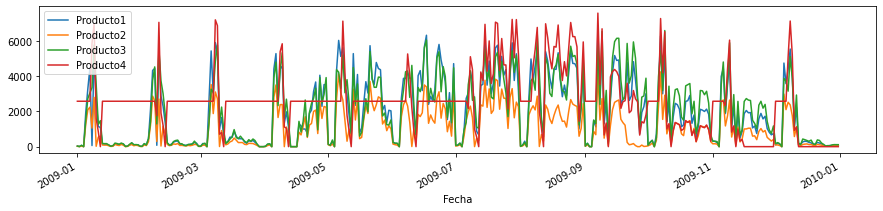

In [93]:
df.plot(figsize=(15,3))

Además de gráficos de línea, pandas tiene otro tipo de gráficos los cuales se puede usar con el argumento `kind` dentro del método DataFrame.plot(). Los otro gráficos disponibles son:

* `'bar'` or `'barh'` for bar plots
* `'hist'` for histogram
* `'box'` for boxplot
* `'kde'` or `'density'` for density plots
* ‘`'area'` for area plots
* `'scatter'` for scatter plots
* `'hexbin'` for hexagonal bin plots
* `'pie'` for pie plots

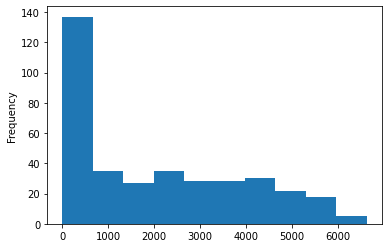

In [94]:
df.Producto1.plot(kind='hist')
plt.show()

In [95]:
df.Producto1.value_counts()

0       18
24       3
239      3
105      3
158      2
        ..
4417     1
326      1
6320     1
2888     1
3307     1
Name: Producto1, Length: 329, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a22586ad0>]],
      dtype=object)

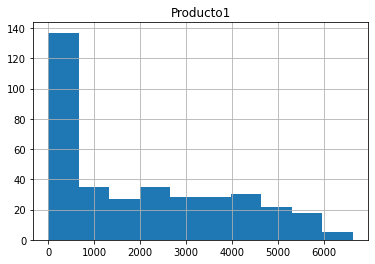

In [96]:
df.hist(column='Producto1')

<p><a name="operacionesColFil"></a></p>

## 1.6. Operaciones con columnas y filas
La función `apply` regresa algún valor después de aplicarle una función a cada columna/fila del dataframe. 


In [97]:
df['Producto3sqrt']=df.Producto3.apply(np.sqrt)

In [98]:
df.tail()

,Producto1,Producto2,Producto3,Producto4,Producto3sqrt
Fecha,,,,,
2009-12-27,66,29,52,0.0,7.211103
2009-12-28,61,41,99,0.0,9.949874
2009-12-29,89,52,115,0.0,10.723805
2009-12-30,76,43,115,0.0,10.723805
2009-12-31,53,46,112,0.0,10.583005


In [99]:
np.sqrt(99)

9.9498743710662

In [100]:
df.apply(np.sum, axis=0)

Producto1        738912.000000
Producto2        386992.000000
Producto3        764007.000000
Producto4        940371.235955
Producto3sqrt     14277.399684
dtype: float64

In [101]:
df.apply(np.sum, axis=1)

Fecha
2009-01-01    2666.275630
2009-02-01    2625.049966
2009-03-01    2639.049966
2009-04-01    2627.232534
2009-05-01    2960.233893
                 ...     
2009-12-27     154.211103
2009-12-28     210.949874
2009-12-29     266.723805
2009-12-30     244.723805
2009-12-31     221.583005
Length: 365, dtype: float64

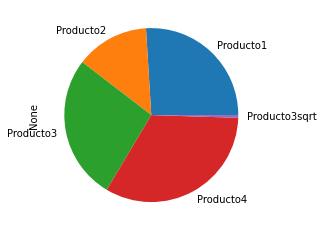

In [102]:
df.apply(np.sum, axis=0).plot(kind='pie')

<p><a name="agrupacion"></a></p>

## 1.7. Agrupando dataframes
El comando `groupby` permite agrupar y generar calculos y operaciónes sobre los valores agrupados.

In [103]:
for idx in df.index:
  print(type(idx))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.tim

In [104]:
[i.month for i in df.index]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 1,


In [105]:
df["month"] = [i.month for i in df.index] # Comprensión de lista
df.head()

,Producto1,Producto2,Producto3,Producto4,Producto3sqrt,month
Fecha,,,,,,
2009-01-01,29,20,35,2576.359551,5.916080,1
2009-02-01,19,3,22,2576.359551,4.690416,2
2009-03-01,24,12,22,2576.359551,4.690416,3
2009-04-01,24,8,15,2576.359551,3.872983,4
2009-05-01,120,111,141,2576.359551,11.874342,5


In [106]:
df.groupby("month").max()

,Producto1,Producto2,Producto3,Producto4,Producto3sqrt
month,,,,,
1,5298,2796,5765,6939.0,75.927597
2,5451,2868,5517,7052.0,74.276510
3,5904,3523,5762,7194.0,75.907839
4,5278,3499,5327,5837.0,72.986300
5,6028,4120,5397,7121.0,73.464277
6,6320,3499,6047,5259.0,77.762459
7,6100,3825,5536,7219.0,74.404301
8,5452,2865,6379,7044.0,79.868642
9,6626,4227,6535,7575.0,80.839347


In [107]:
df.groupby("month").count()[["Producto1"]]
#df.groupby("month").count().Producto1 No se puede acceder mediante el . a las columnas

,Producto1
month,
1,31
2,28
3,31
4,30
5,31
6,30
7,31
8,31
9,30


In [108]:
df2 = pd.DataFrame({"Person": ["John", "Myla", "Lewis", "John", "Myla", "Lewis", "John", "Myla"], "Age": [24, 55, 21, 24, 26, 43, 64, 55]})
df2.head(8)

,Person,Age
0,John,24
1,Myla,55
2,Lewis,21
3,John,24
4,Myla,26
5,Lewis,43
6,John,64
7,Myla,55


In [109]:
df2.groupby("Person").min()

,Age
Person,
John,24
Lewis,21
Myla,26


In [110]:
# Agrupar por persona y aplicar "min" a "Age"
#df2.groupby("Person").Age.agg("min")             
df2.groupby("Person").Age.agg(["min", "max"])


,min,max
Person,,
John,24,64
Lewis,21,43
Myla,26,55


In [111]:
# Agrupar por persona y edad y aplicar "count" a "Age"
df3 = df2.groupby(["Age"]).agg({"Age":"count"})
df3

,Age
Age,
21,1
24,2
26,1
43,1
55,2
64,1


In [112]:
df3.columns = ['Edad']
df3

df3.sort_values(by='Edad', ascending=False)

,Edad
Age,
24,2
55,2
21,1
26,1
43,1
64,1


In [113]:
# frecuencia de las edades
df2['Age'].value_counts()
#df2["Age"].value_counts(Normlize=True)

55    2
24    2
21    1
43    1
26    1
64    1
Name: Age, dtype: int64

In [114]:
pd.DataFrame(df2.Person.value_counts())

,Person
Myla,3
John,3
Lewis,2


<p><a name="renormalizacion"></a></p>

## 1.8. Normalización de datos
En algunos algoritmos de Machine Learning (ML) es importante tener los datos normalizados. Para ellos la función `scale` se encarga de normalizar los datos quedando con una media cercana a 0 y una desviación estandar de 1

In [115]:
from sklearn import preprocessing

In [120]:
scaled=preprocessing.scale(df[['Producto4', 'Producto3sqrt']])
df_scaled = pd.DataFrame(scaled)
df_scaled.describe()

,0,1
count,3.650000e+02,3.650000e+02
mean,-2.287364e-16,4.270557e-16
std,1.001373e+00,1.001373e+00
min,-1.489409e+00,-1.648410e+00
25%,-5.713765e-01,-1.012089e+00
50%,-2.628921e-16,8.195519e-02
75%,-2.628921e-16,8.518219e-01
max,2.889743e+00,1.771800e+00


In [121]:
scaled.mean(axis=0)

array([-3.60367507e-16,  1.94669243e-16])

In [122]:
scaled.std(axis=0)

array([1., 1.])

<p><a name="bineado"></a></p>

## 1.9. Bineado de datos
La función `cut` nos permite separar los datos en bloques (bins)

In [123]:
df.Producto1[:10]

Fecha
2009-01-01     29
2009-02-01     19
2009-03-01     24
2009-04-01     24
2009-05-01    120
2009-06-01    261
2009-07-01     60
2009-08-01     24
2009-09-01     35
2009-10-01     81
Name: Producto1, dtype: int64

Se puede seleccionar el número de bins deseado y el programa obtiene la distribución óptima de los mismos

In [129]:
19+(df.Producto1[:10].max()-df.Producto1[:10].min())/3

99.66666666666667

In [124]:
pd.cut(df.Producto1[:10], bins=3)

Fecha
2009-01-01     (18.758, 99.667]
2009-02-01     (18.758, 99.667]
2009-03-01     (18.758, 99.667]
2009-04-01     (18.758, 99.667]
2009-05-01    (99.667, 180.333]
2009-06-01     (180.333, 261.0]
2009-07-01     (18.758, 99.667]
2009-08-01     (18.758, 99.667]
2009-09-01     (18.758, 99.667]
2009-10-01     (18.758, 99.667]
Name: Producto1, dtype: category
Categories (3, interval[float64]): [(18.758, 99.667] < (99.667, 180.333] < (180.333, 261.0]]

Se puede seleccionar los intervalos de los bins deseados

In [130]:
pd.cut(df.Producto1[:10],bins=[0,100,200,300])

Fecha
2009-01-01      (0, 100]
2009-02-01      (0, 100]
2009-03-01      (0, 100]
2009-04-01      (0, 100]
2009-05-01    (100, 200]
2009-06-01    (200, 300]
2009-07-01      (0, 100]
2009-08-01      (0, 100]
2009-09-01      (0, 100]
2009-10-01      (0, 100]
Name: Producto1, dtype: category
Categories (3, interval[int64]): [(0, 100] < (100, 200] < (200, 300]]

Se pueden poner etiquetas sobre los bins

In [133]:
pd.cut(df.Producto1[:10],bins=3, labels=['bajo','medio','alto'])

Fecha
2009-01-01     bajo
2009-02-01     bajo
2009-03-01     bajo
2009-04-01     bajo
2009-05-01    medio
2009-06-01     alto
2009-07-01     bajo
2009-08-01     bajo
2009-09-01     bajo
2009-10-01     bajo
Name: Producto1, dtype: category
Categories (3, object): ['bajo' < 'medio' < 'alto']

<p><a name="concom"></a></p>

## 1.10. Concatenación y combinación de dataframes

La concatenación se realiza mediante la función `concat()` y la combinación mediante la función `merge()`

In [134]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

In [135]:
data1

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [136]:
data2

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [137]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [139]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs: Union[Iterable[~FrameOrSeries], Mapping[Union[Hashable, NoneType], ~FrameOrSeries]], axis=0, join='outer', ignore_index: bool = False, keys=None, levels=None, names=None, verify_integrity: bool = False, sort: bool = False, copy: bool = True) -> Union[ForwardRef('DataFrame'), ForwardRef('Series')]
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they ar

In [138]:
# Concatenar por filas
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [142]:
# Concatenar por columnas
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [141]:
all_data_col.subject_id

,subject_id,subject_id
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8


In [143]:
# Combinar all_data y data3 a lo largo del valor de subject_id
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [148]:
set(data1.subject_id) & set(data2.subject_id)


{'4', '5'}

In [144]:
# Combinar solo los datos que tienen el mismo 'subject_id' en data1 y data2 (interseccion)
pd.merge(data1, data2, on='subject_id', how='inner') # inner join

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [149]:
# Combinar solo los datos que tienen el mismo 'subject_id' en data1 y data2 (union)
pd.merge(data1, data2, on='subject_id', how='outer')



,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


In [150]:
set(data1.subject_id) | set(data2.subject_id)


{'1', '2', '3', '4', '5', '6', '7', '8'}

<p><a name="tallpan"></a></p>

## 3. Taller Pandas

### Ejercicio 1 

Cargue el dataset provisto en la dirección 'https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv'  grafique la ganancia total (total_profit) para todos los meses. La gráfica debe tener las siguientes propiedades:

* El estilo de línea punteado y de color rojo 
* Mostrar la legenda (legend) en la parte inferior derecha
* X label name = Month Number
* Y label name = Profits in dollars
* Título : Company sales data of last year
* Los markers deben ser circulares y de color negro
* El grosor de la línea debe ser 3

Solución esperada:
<p><img  height="260px" src="https://pynative.com/wp-content/uploads/2019/01/matplotlib_and_pandas_exercise_2_plot_style_properties-768x512.png" align="center" hspace="10px" vspace="0px"></p>

Para ver la solución haga double-click <b>aquí</b>.
<!--

import pandas as pd
import matplotlib.pyplot as plt  
df = pd.read_csv('https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv')
profitList = df ['total_profit'].tolist()
monthList  = df ['month_number'].tolist()
plt.plot(monthList, profitList, label = 'Profit data of last year', 
      color='r', marker='o', markerfacecolor='k', 
      linestyle='--', linewidth=3)
      
plt.xlabel('Month Number')
plt.ylabel('Profit in dollar')
plt.legend(loc='lower right')
plt.title('Company Sales data of last year')
plt.xticks(monthList)
plt.yticks([100000, 200000, 300000, 400000, 500000])
plt.show()
-->

### Ejercicio 2

Dataset: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user

1. Importar el dataset, asignarlo a una variable llamada *users* y usar el *user_id* como índice.
2. ¿Cuál es el número de observaciones y columnas en el dataset? 
3. Mostrar el nombre de las columnas y el tipo de dato que contiene.
4. Mostrar la indexación del dataset.
5. ¿Cuántas ocupaciones diferentes hay en este conjunto de datos?
6. ¿Cuál es la ocupación más frecuente?
7. ¿Cuál es la edad media de los usuarios?
8. ¿Cuál es la edad con menos ocurrencia?


Para ver la solución haga double-click <b>aquí</b>.
<!--

1. 

import pandas as pd

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', delimiter='|', index_col='user_id')
users.head()
  
2.
print("Número de observaciones:",users.shape[0])
print("Número de columnas: ",users.shape[1])

3.
print("Columnas: ",users.columns)
print("Tipo de datos: \n",users.dtypes)

4.
print("Indexación: ",users.index)

5.
print("Número de ocupaciones diferentes:",users.occupation.nunique())

6.
print("Ocupaciones más frecuentes:\n",users.occupation.value_counts().head())

7.
print("Edad media de los usuarios:",round(users.age.mean()))

8.
print("Edades de menos ocurrencia:\n",users.age.value_counts().tail(10))

-->

### Ejercicio 3

Diccionario dado:

raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}
            
1. Crea un DataFrame llamado *army* a partir del diccionario dado 

(No olvide incluir los nombres de las columnas en el orden presentado en el diccionario ('regimen', 'company', ...) para que el orden del índice de la columna sea coherente con las soluciones. Si se omite, Pandas ordenará las columnas alfabéticamente.

2. Establezca la columna 'origin' como índice del dataset.
3. Imprima las columnas 'veterans' y 'deaths'
4. Seleccione las columnas 'deaths', 'size' y 'deserters' de Maine a Alaska.
5. Seleccione la tercera columna hasta la séptima columna.
6. Seleccione las filas donde *deaths* sea mayor que 50.
7. Seleccione las filas donde *deaths* sea mayor que 500 o menor que 50.
8. Selecciona todos los *regiments* no nombrados *Dragoons*.
9. Seleccione la tercera celda en la fila llamada *Arizona*
10. Seleccione la tercera celda en la columna llamada *deaths*


Para ver la solución haga double-click <b>aquí</b>.
<!--
1.
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35], 'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9], 'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523], 'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345], 'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3], 'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], 'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3], 'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

army = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'deaths', 'battles', 'size', 'veterans', 'readiness', 'armored', 'deserters', 'origin'])

army.head()

2.
army = army.set_index("origin")
army.head()

3. 
army[['veterans', 'deaths']]

4.
army.loc[['Maine','Alaska'] , ["deaths","size","deserters"]]

5.
army.iloc[: , 4:7]

6.
army[army['deaths'] > 50]

7. 
army[(army['deaths'] > 500) | (army['deaths'] < 50)]

8.
army[(army['regiment'] != 'Dragoons')]

9.
army.loc[['Arizona'], ['deaths']]

#O

#army.iloc[[0]

10.
army.loc['Texas', 'deaths']

#O

#army.iloc[[2]


-->

### Ejercicio 4

Dataset: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user

1.  Importar el dataset, asignarlo a una variable llamada *users* y usar el *user_id* como índice.
2. ¿Cuál es la edad media por ocupación?
3. Descubra la proporción de hombres por ocupación y clasifíquela de mayor a menor (cree una columna).
4. Para cada ocupación calcule las edades mínimas y máximas.
5. Para cada combinación de ocupación y género calcule la edad media.
6. Para cada ocupación muestre el porcentaje de mujeres y hombres.

Para ver la solución haga double-click <b>aquí</b>.
<!--

1. 

import pandas as pd

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', delimiter='|', index_col='user_id')
users.head()
  
2.
users.groupby('occupation').age.mean()

3.
# funcion que mapea el genero a un numero
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

# aplica la funcion a la columna genero y saca el porcentaje de hombres por ocupacion
users['gender_n'] = users['gender'].apply(gender_to_numeric)

# se 
a = users.groupby('occupation').gender_n.sum() / users.occupation.value_counts() * 100 

# ordenamiento de mayor a menor
a.sort_values(ascending = False)

4.
users.groupby('occupation').age.agg(['min', 'max'])

5.
users.groupby(['occupation', 'gender']).age.mean()

6.
# crea un dataframe y aplica "count" al genero
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

# crea un dataframe y aplica "count" para cada ocupacion
occup_count = users.groupby(['occupation']).agg('count')

# divida gender_ocup por occup_count y multiplique por 100
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100

# mostrar todas las filas de la columna genero
occup_gender.loc[: , 'gender']

-->